In [3]:
r = read.csv("C:/Users/Michael/Desktop/Multiple_Linear_Regression/Bdemand.csv", header=T, dec=",")

- Received data from Fred.stlouisfed.org and blockchain.info
- We focus on four variables which are the price of bitcoin, the price of Nasdaq, the supply level of bitcoin, and the interest rates levels set by the federal reserve
- Data starts on Jan 6th, 2013 and ends on Nov 26th, 2017
- 256 observations 

## Hypothesis

- Which economic variables affect bitcoin supply and/or demand
- As bitcoin demand increases, the higher the amount of miners enter the field
- The bitcoin demand is affected by other economic variables also

## Data Set

In [4]:
head(r)

Date,Price,NASDAQ,Supply,i.rates
6-Jan-13,13.15,3083.5,10635975,1.87
13-Jan-13,13.64,3108.76,10659800,1.9
20-Jan-13,15.5,3123.31,10682925,1.87
27-Jan-13,17.6,3144.24,10707850,1.9
3-Feb-13,20.29,3154.3,10735950,2.02
10-Feb-13,23.7,3166.05,10763500,2


In [6]:
r = as.data.frame(r)
y = gsub(",","",r$Price)

Quantity = as.numeric(as.character(r$Supply), na.action(r$Supply))
Qd = Quantity 

Price = as.numeric(as.character(y), na.action(y))
P = Price

NASDAQ = as.numeric(as.character(r$NASDAQ), na.action(r$NASDAQ))
P.other =  NASDAQ

I.Rates = as.numeric(as.character(r$i.rates), na.action(r$i.rates))
I =  I.Rates

## Bitcoin Price Vs Supply

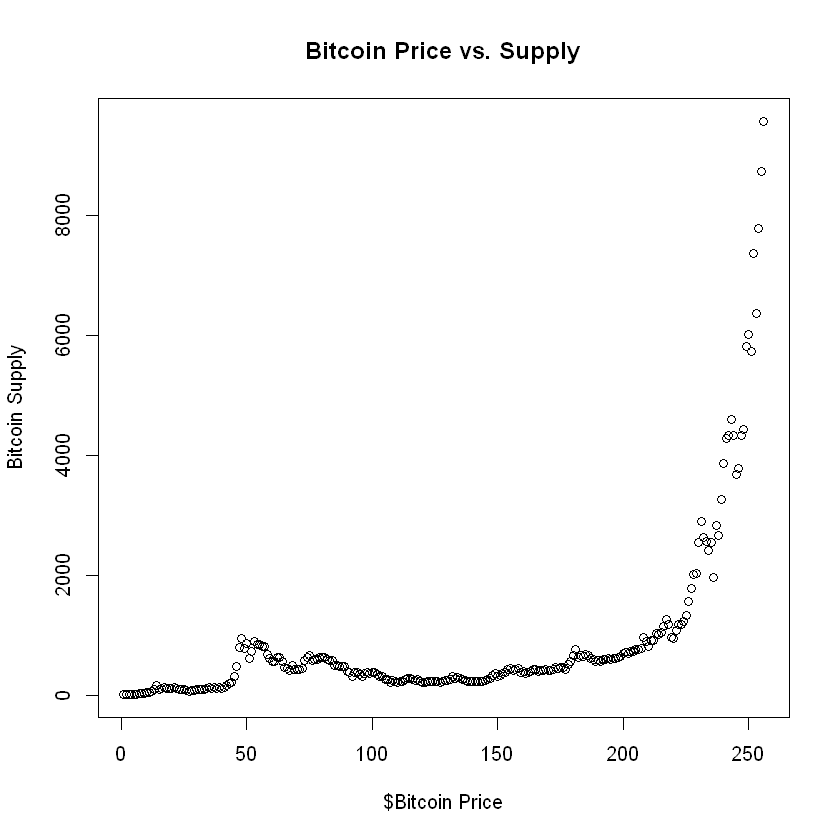

In [26]:
plot(P, Qd, xlab = "$Bitcoin Price", ylab ="Bitcoin Supply", main = "Bitcoin Price vs. Supply")

## Bitcoin Price Vs Bitcoin Supply part 2
- As the price of bitcoin has increased the supply of bitcoin has dramatically increased initially
- Once bitcoin reached around $2000 the rate of supply growth decreased exponentially

## Bitcoin Price Vs Interest Rates

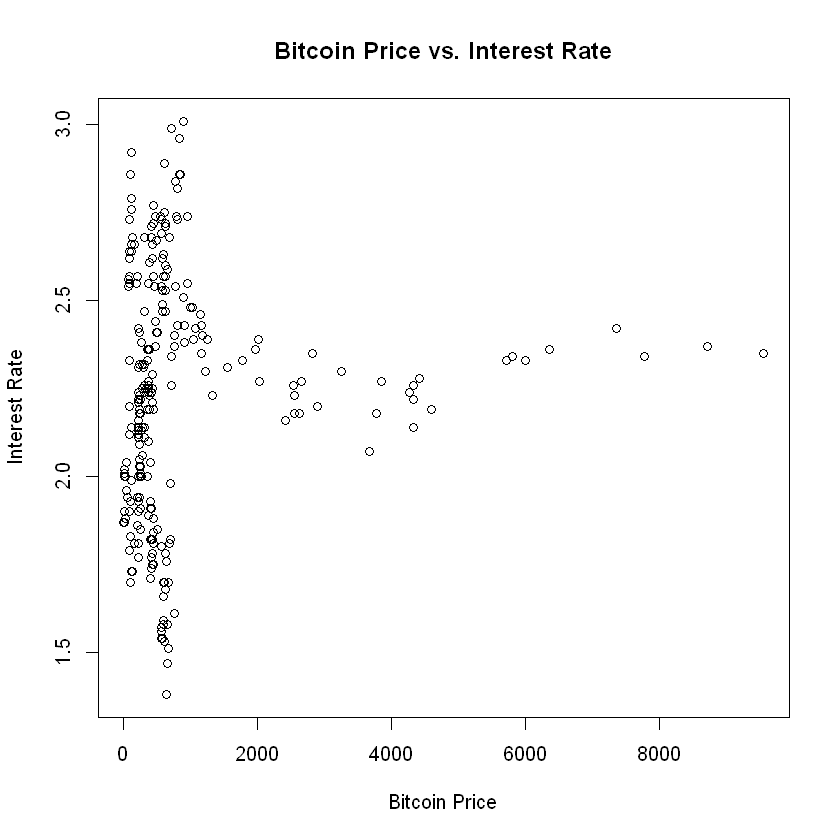

In [8]:
plot(P, I, xlab = "Bitcoin Price", ylab ="Interest Rate", main = "Bitcoin Price vs. Interest Rate")

## Bitcoin Price Vs Interest rates part 2
- When the Bitcoin price was fluctuating below 1000 usd the interest rates were more wide ranging but once the price crossed the 1000 usd threshold interest rates have fluctuated between 2.2 to approx. 2.5
- This may due to the fact that most of bitcoin price data from prior to reaching the 1000 usd threshold may have been taken through a longer period of time. Since the wide ranging fluctuation of interest rates would have come about when the federal reserve decides to increase or decrease interest rates

## Bitcoin Price Vs Nasdaq

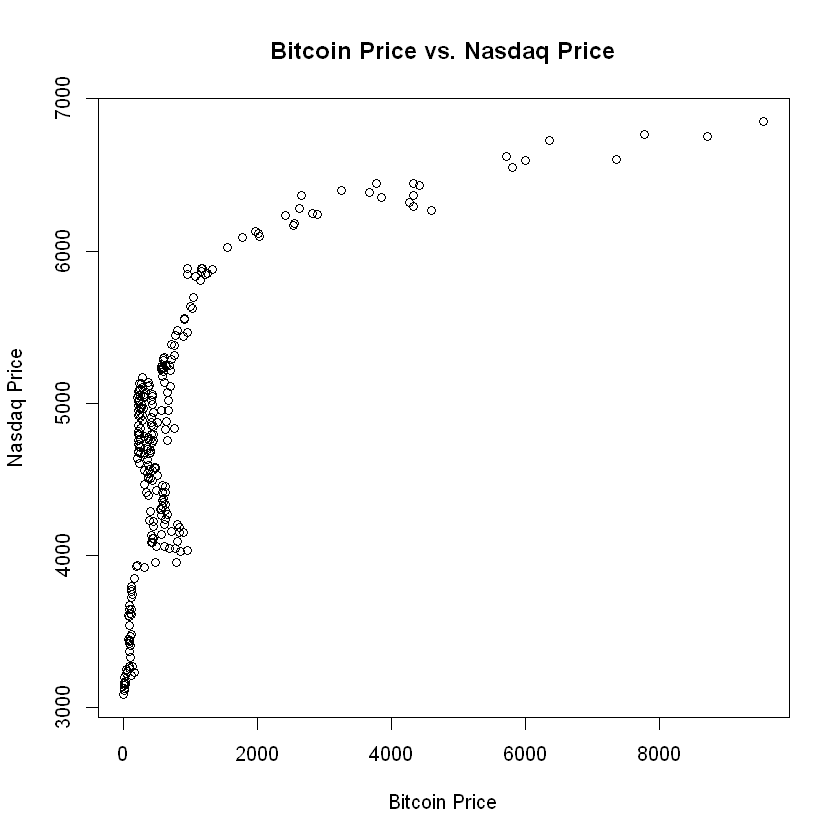

In [9]:
plot(P, P.other, xlab = "Bitcoin Price", ylab ="Nasdaq Price", main = "Bitcoin Price vs. Nasdaq Price")

## Bitcoin price vs Nasdaq Price part 2

- We can see here as the bitcoin price increases initially, the slope of the nasdaq price been decreasing
- This is especially notable once bitcoin crossed the mark of approx. 1500 usd, where prior it increased exponentially but after the increase in nasdaq price growth has decreased exponentially

In [11]:
summary(P)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.15  239.56  437.56  887.45  726.83 9560.00 

- We can see here that in this histogram of Bitcoin price the peak of the data occurs at about 0 - 1000 usd
- Also interesting is that the data is extremely skewed to the left with most of the frequency of data falling off dramatically once the 1000 usd mark was passed
- This is also due to the fact that throughout most of Bitcoins life span has was when its price was below 1000 usd


In [13]:
summary(Qd)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
10635975 12574262 14285600 14107672 15855212 16701400 

- The supply of bitcoin on the other hand is distributed more evenly in it's histogram chart
- The peak of the bitcoin supply histogram data falls along the range of 16 million on the higher end
- Once the supply of bitcoin hit 16 million the frequency of data points increase from below 20 to near 30 and once it hit the 16.5 million supply mark it's frequency jumped up above 30 


In [27]:
summary(P.other)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3084    4188    4787    4773    5223    6852 

## Nasdaq Price frequency

- Here its noticeable that the peak of the Nasdaq data has been around the 4500 usd mark with a frequency of about 70 
- Also the distribution of the histogram doesn't seem to be noticeable skewed in any signficant direction

## Interest Rates

In [29]:
summary(I)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.380   1.975   2.255   2.237   2.495   3.010 

- The bulk of data in the interest rate histogram falls along the 2.25-2.4 level with a frequency of 60 data poingts. 
- The data seems to also be skewed to the right.

## Correlation Quantity Demanded & Price

In [18]:
cor.test(Qd, P)


	Pearson's product-moment correlation

data:  Qd and P
t = 9.5974, df = 254, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4198279 0.6004987
sample estimates:
      cor 
0.5158768 


## Correlation Quantity Demanded and Price of Nasdaq

In [19]:
cor.test(Qd, P.other)


	Pearson's product-moment correlation

data:  Qd and P.other
t = 40.358, df = 254, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9114365 0.9449515
sample estimates:
      cor 
0.9301049 


## Quantity demanded and Interest Rates

In [21]:
cor.test(Qd, I)


	Pearson's product-moment correlation

data:  Qd and I
t = -5.2229, df = 254, p-value = 3.67e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4180590 -0.1963121
sample estimates:
       cor 
-0.3114188 



## Econometric Hypothesis

- Our stated hypothesis for the regression analysis is that the Nasdaq (which is a market proxt proxy for movements in tech stocks) has a positive effect on the bitcoin quantity demanded by consumers and the quantity supplied by the market. 
- Our hypothesis is boased on the following economic demand function of q=f(P, P.other, Y) where P is the price of the good, P.other is the price of a related good, and Y represents income 

## Simple Linear Regression Analysis

In [22]:
r.lm1 <- lm(Qd ~ P.other, data = r)
summary(r.lm1)


Call:
lm(formula = Qd ~ P.other, data = r)

Residuals:
     Min       1Q   Median       3Q      Max 
-1405439  -442891  -245973   396224  2030746 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.930e+06  2.313e+05   21.31   <2e-16 ***
P.other     1.923e+03  4.765e+01   40.36   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 676600 on 254 degrees of freedom
Multiple R-squared:  0.8651,	Adjusted R-squared:  0.8646 
F-statistic:  1629 on 1 and 254 DF,  p-value: < 2.2e-16


## Linear Regression Plot

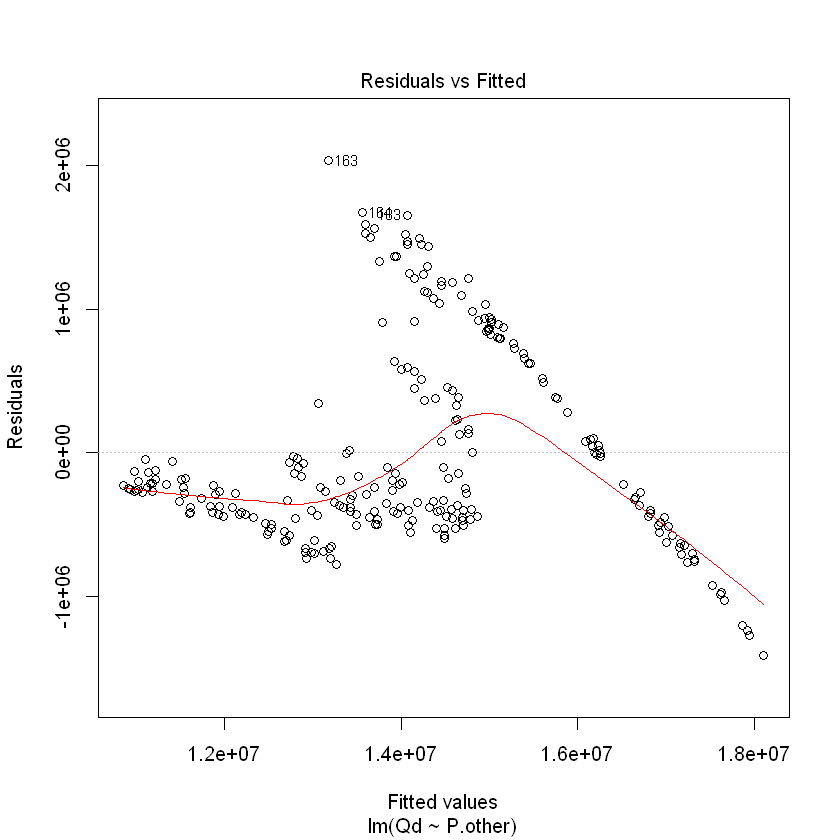

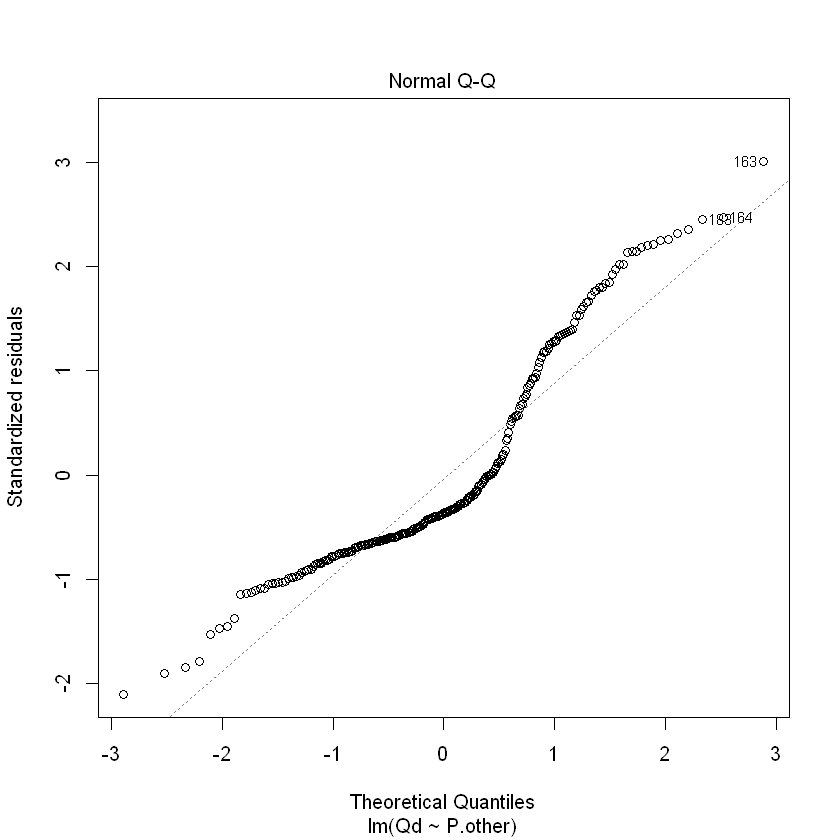

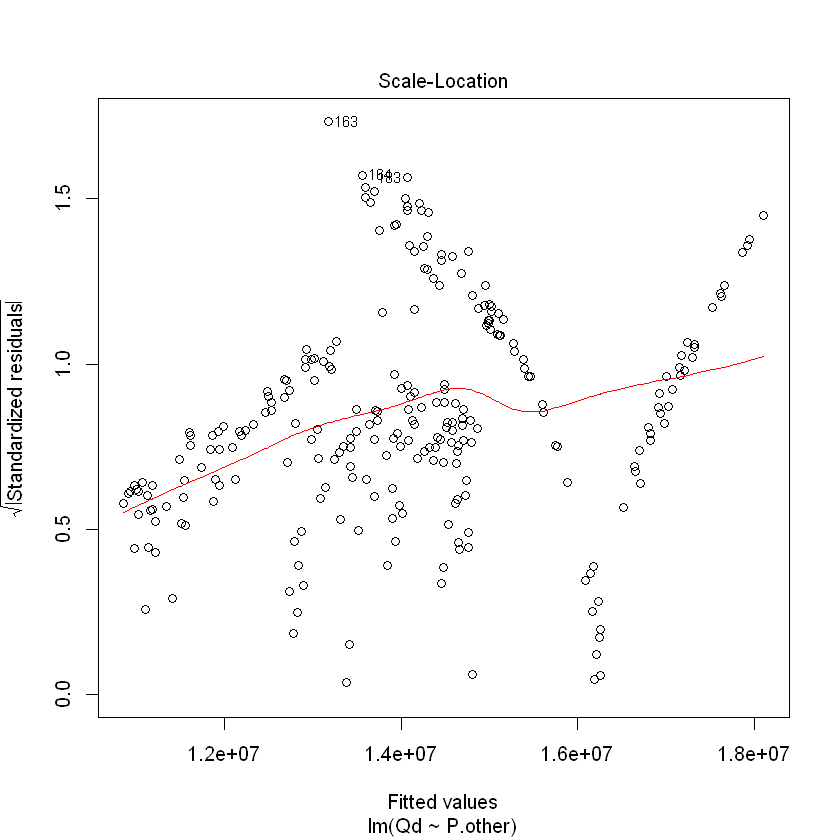

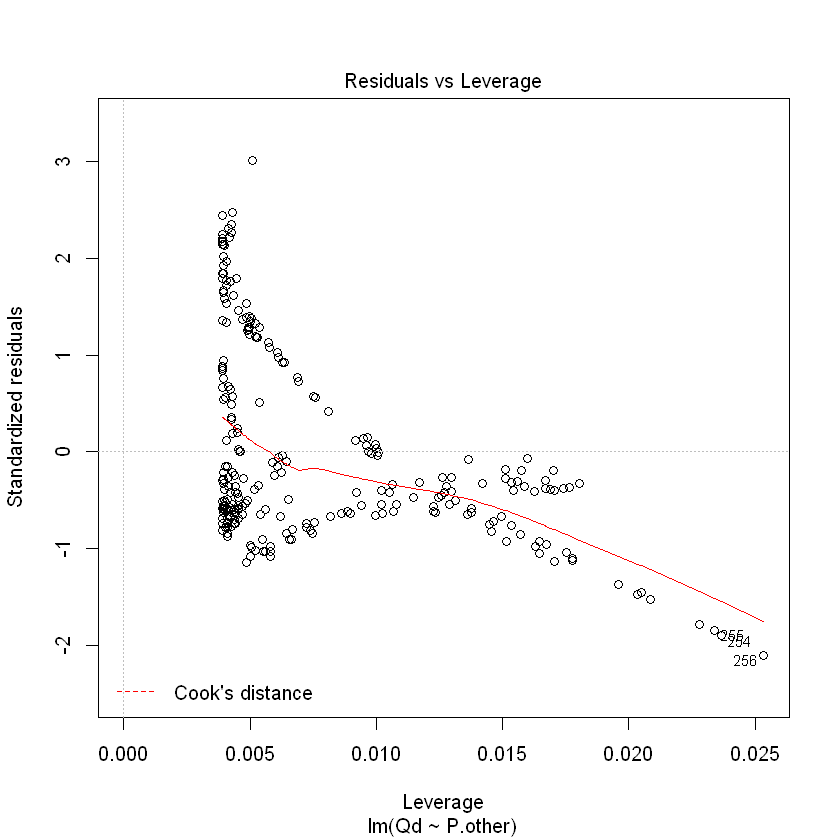

In [23]:
plot(r.lm1)
par(ask=F)

## Multilinear Regression
- Since economic theory states that other variables may also affect the quantity supplied such as the price of bitcoin and interest rates, I decided to add these following variables
- The individual maintained hypothesis which is separate from the main hypothesis (which only accounts for the relationship between two of the 4 of our variables) are the two hypothesis that the price of bitcoin is inversely related to the bitcoin supply while interest rates are also inversely rated to supply demand of bitcoin

## Multiple Linear Regression Analysis

In [24]:
r.lm <- lm(Qd ~ P + P.other + I, data = r)
summary(r.lm)


Call:
lm(formula = Qd ~ P + P.other + I, data = r)

Residuals:
     Min       1Q   Median       3Q      Max 
-1042378  -343578    -5464   302549  1504392 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6244624.23  324966.09  19.216  < 2e-16 ***
P              -244.61      30.15  -8.113 2.18e-14 ***
P.other        2156.82      48.82  44.177  < 2e-16 ***
I           -989594.89   89515.75 -11.055  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 487600 on 252 degrees of freedom
Multiple R-squared:  0.9305,	Adjusted R-squared:  0.9296 
F-statistic:  1124 on 3 and 252 DF,  p-value: < 2.2e-16


- When looking over the regression analysis above we can see that the signs of each coefficient of each variable abides by our hypothesis which is aligned to the economic demand equation due to the...
- Sign of the price of bitcoin showing that it's inversely related to supply
- The sign of the price of Nasdaq being positive which shows that it is positively related to the supply of bitcoin
-and the sign of interest rates being negative thus showing a negative relationship to interest rates
- We can see that for the Nasdaq its coefficient is 2156.82 which indicates that for every additional dollar increase in the stock market that the bitcoin supply increases by 2156.82 units
- Since the nasdaq price P value is much below 0.05, which is the significance level or alpha level, this indicates that the variable is statistically significant
- The same seems to imply for the two other variable since they both have P-values that also fall far below the 0.05 significance level
- Since the adjusted r-squared is 0.9296 this indicates that the data fall very close to the fitted regression line

## Multilinear Regression Analysis Plot

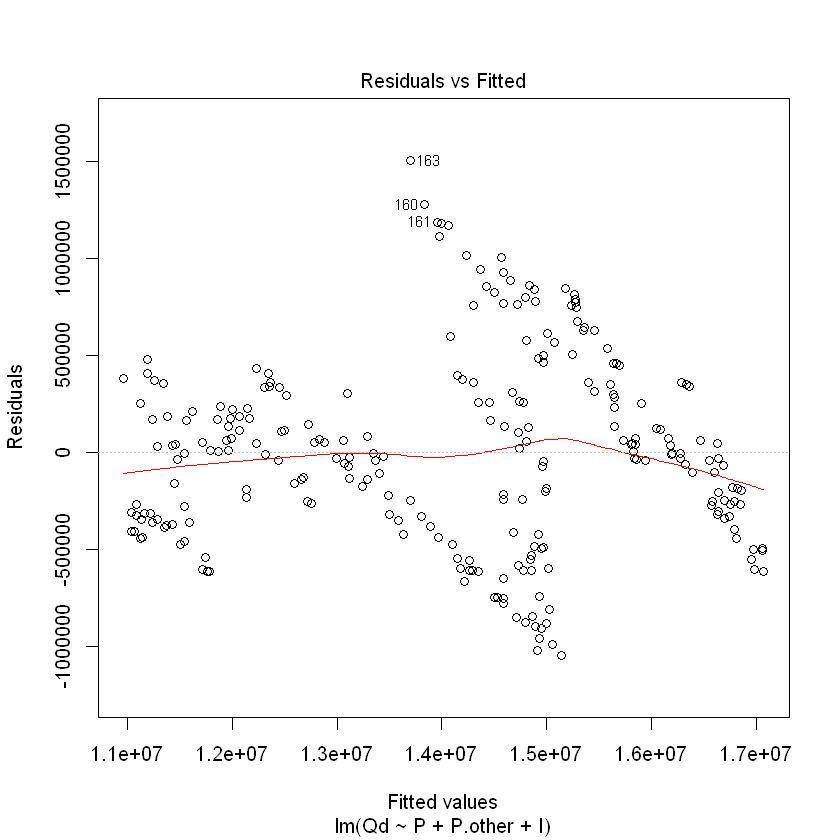

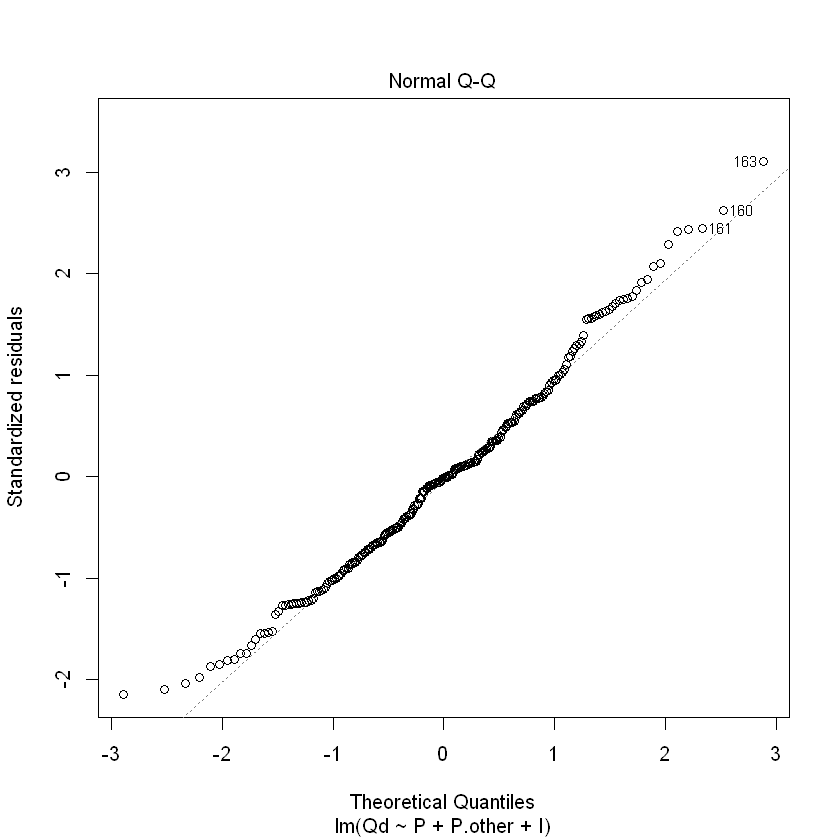

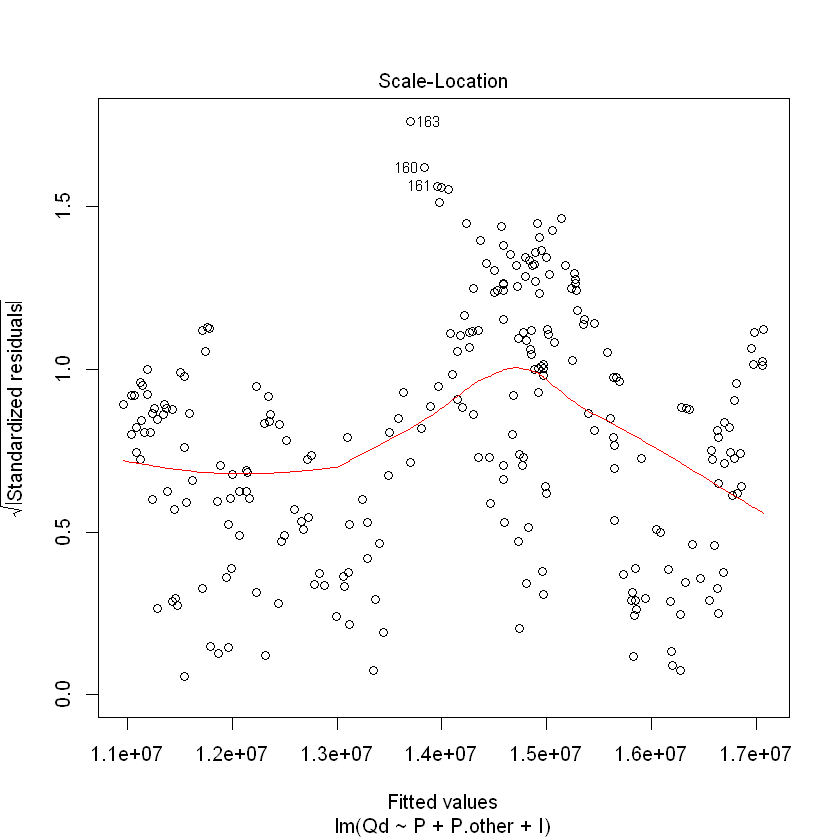

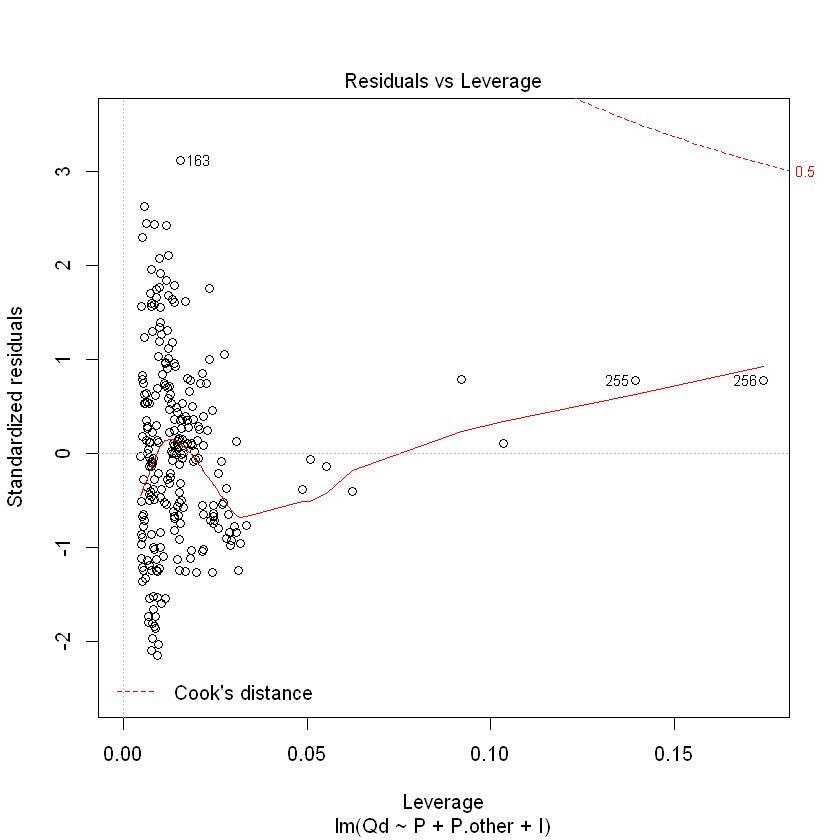

In [25]:
plot(r.lm)
par(ask=F)

## Conclusion
- Going over all of the data above it would seem that our hypothesis that the nasdaq price would have a positive effect on the demand of bitcoin supply is correct due to regression analysis showing a positive coefficient along with the correlation between the two falling around 93% 
- Our secondary hypothesis of the price of bitcoin and the interest rate levels being negatively correlated to the supply of bitcoin also seems to be correct since the sign of the coefficients are correct, the P-values fall far below the 0.05 significance level showing that they are statistically significant. Even though the correlation tests show a 50% and -30% correlation between the respect variables in realtion to the bitcon supply the rest of the data indicates that the data are statistically significant thus do have an effect on the supply of bitcoin aka its demand.